In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/z-score.csv')

In [3]:
df.shape

(1000, 3)

In [5]:
df.sample(3)

,cgpa,placement_exam_marks,placed
989,6.23,31.0,0
108,5.94,10.0,0
91,7.42,6.0,1


<Axes: xlabel='placement_exam_marks', ylabel='Count'>

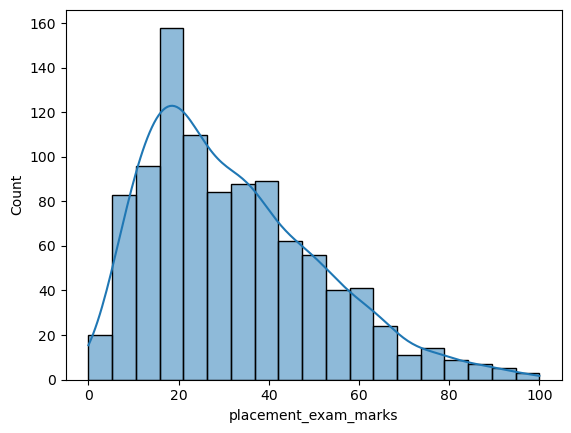

In [8]:
sns.histplot(df['placement_exam_marks'],kde=True)

<Axes: xlabel='placement_exam_marks'>

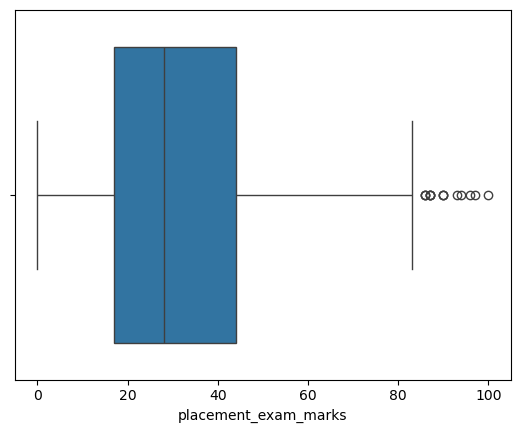

In [10]:
sns.boxplot(x = df['placement_exam_marks'])

In [7]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [15]:
# let's calculate 25 and 75 percintle data
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [16]:
percentile25,percentile75

(17.0, 44.0)

In [17]:
# let's calculate IQR
IQR = percentile75 -  percentile25
IQR

27.0

In [18]:
# let's calculate upper limit and lower limit
upper_limit = percentile75 + 1.5*IQR
lower_limit = percentile25 - 1.5*IQR

In [19]:
upper_limit,lower_limit 

(84.5, -23.5)

In [20]:
# let's detect the outliers
df[(df['placement_exam_marks'] > upper_limit) | (df['placement_exam_marks'] < lower_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


# Trimming

In [23]:
newdf = df[(df['placement_exam_marks'] < upper_limit) & (df['placement_exam_marks'] > lower_limit)]
newdf.shape

(985, 3)

<Axes: xlabel='placement_exam_marks'>

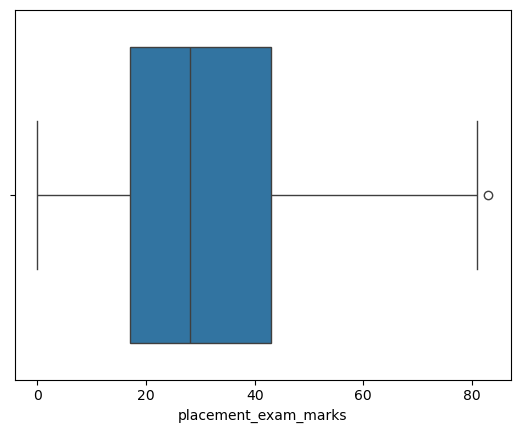

In [31]:
sns.boxplot(x = newdf['placement_exam_marks'])

<Axes: xlabel='placement_exam_marks', ylabel='Count'>

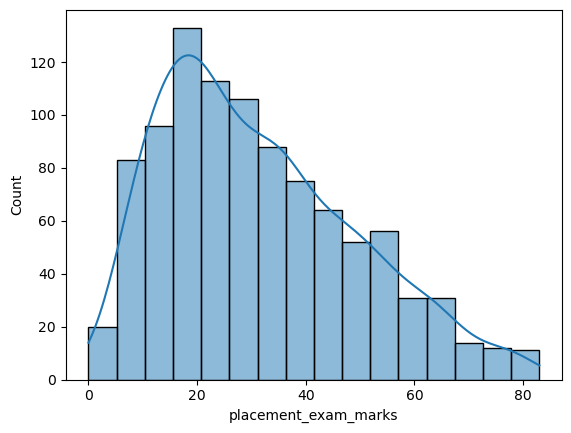

In [32]:
sns.histplot(x = newdf['placement_exam_marks'],kde=True)

# Capping

In [27]:
df['placement_exam_marks'] = np.where(
    df['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        df['placement_exam_marks'] < lower_limit,
        lower_limit,
        df['placement_exam_marks']
    )
)
df.shape

(1000, 3)

<Axes: xlabel='placement_exam_marks'>

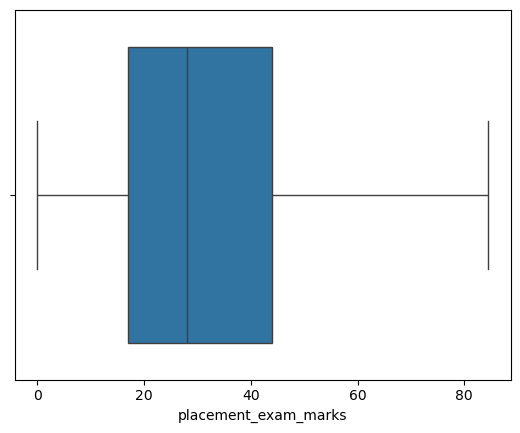

In [29]:
sns.boxplot(x = df['placement_exam_marks'])

<Axes: xlabel='placement_exam_marks', ylabel='Count'>

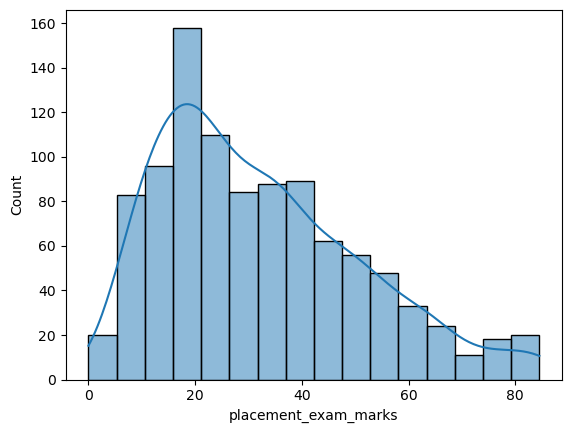

In [30]:
sns.histplot(x = df['placement_exam_marks'],kde=True)